# Portfolio Optimization

```
# Summary
# Demonstration of the theorical concepts
# Optimization by sharpe ratio
# Optimization for minimun volatility
# Minimize risk for a given return
# Maximize return for given risk 
```






## 1 Importaing the required libraries

In [ ]:
#Installing some packages

!pip install yfinance
!pip install streamlit
!pip install PyPortfolioOpt

In [ ]:
# Importing the libraries

from pandas_datareader import data as web
import pandas as pd
import numpy as np
import yfinance as yf
import pytz
import streamlit as st
import matplotlib.pyplot as plt
from datetime import datetime
import math


## 2 Getting the data
###The data set was got using the yfinance library which allows to get the data in real time. 

In [ ]:
from riskfolio.src.ConstraintsFunctions import assets_clusters
# Reading the data frame

tz = pytz.timezone("America/Maceio") #setting the timezone
start = tz.localize(datetime(2010,1,1)) #setting the start date
end = tz.localize(datetime.today()) #setting the end date

assets = "VIVT3.SA,ENBR3.SA,CSAN3.SA,AURA33.SA,NTCO3.SA,PSSA3.SA,MGLU3.SA,CSNA3.SA,AMZO34.SA,BRAP4.SA".split(",") 
df_stocks = yf.download(assets,start, end, auto_adjust=True, )['Close'] #getting the historical data from yahoo finance

display(df.head())


[*********************100%***********************]  10 of 10 completed


,AMZO34.SA,AURA33.SA,BRAP4.SA,CSAN3.SA,CSNA3.SA,ENBR3.SA,MGLU3.SA,NTCO3.SA,PSSA3.SA,VIVT3.SA
Date,,,,,,,,,,
2010-01-04,NaN,NaN,1426.0872%,388.6406%,1362.3440%,498.2598%,NaN,NaN,490.8080%,1296.9481%
2010-01-05,NaN,NaN,1454.8272%,388.7931%,1374.9473%,502.0997%,NaN,NaN,482.4891%,1292.1425%
2010-01-06,NaN,NaN,1475.1998%,377.6673%,1376.6440%,509.4833%,NaN,NaN,493.1847%,1270.1717%
2010-01-07,NaN,NaN,1491.5709%,357.5495%,1362.1019%,513.1752%,NaN,NaN,499.1267%,1270.1717%
2010-01-08,NaN,NaN,1513.3987%,360.7500%,1392.8823%,519.8207%,NaN,NaN,498.8890%,1269.1414%


## 3 Visualizing the stock over time

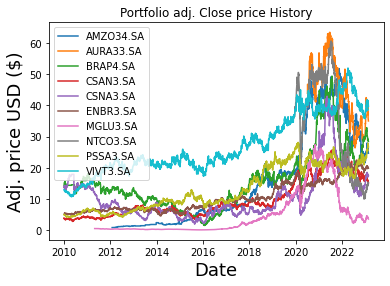

In [ ]:
# Visualy show the stock / portfolio
title = 'Portfolio adj. Close price History'

#Get the stock 
my_stock = df_stocks

# Create and plot the graph

for c in my_stock.columns.values:
  plt.plot(my_stock[c], label = c )

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. price USD ($)', fontsize = 18)
plt.legend(my_stock.columns.values, loc = 'upper left')

##5 Getting the return for each stock

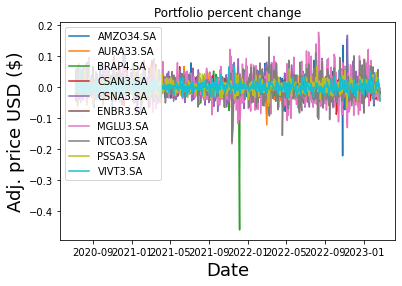

In [ ]:
# show de daily simple return

returns = df.pct_change().dropna() #function to calculate the return of the stock. 
returns

# Create and plot the graph

title = 'Portfolio percent change'

for c in returns.columns.values:
  plt.plot(returns[c], label = c ) #Loop to obtain the return for each stock

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. price USD ($)', fontsize = 18)
plt.legend(returns.columns.values, loc = 'upper left')

## 6 Creating the covariance matrix

In [ ]:
#Create and show the covariance matrix (ENTENDER MELHOR ISSO PORQUE MULTIPLICA POR 252)

cov_matrix = returns.cov()*252
cov_matrix

,AURA33.SA,CSAN3.SA,ENBR3.SA,VIVT3.SA
AURA33.SA,0.143979,0.022488,0.008403,0.007223
CSAN3.SA,0.022488,0.122794,0.036881,0.026966
ENBR3.SA,0.008403,0.036881,0.085082,0.022342
VIVT3.SA,0.007223,0.026966,0.022342,0.081218


## 7 obtaining the annual mean return  and the volatility of the portfolio

In [ ]:
# DEMONSTRATION OF THE THEORICAL CONCEPTS FOR A GIVEN WEIGTHS

# Assign weigths to the stocks

weights = np.array([0.2, 0.2 ,0.2 ,0.2])

# Calculate de porfolio variance

port_variance = np.dot(weights.T, np.dot(cov_matrix,weights))
#print('Portfolio variance:', str(round(port_variance , 3)*100),'%') 

# calculate  the portfolio volatility 

port_volatility = np.sqrt(port_variance)
print( 'portfolio volatility:', str(round(port_volatility , 2)*100 ),'%')  

# Calculate de portfolio annual return

port_annual_return = np.sum(returns.mean()*  weights)*252
print('Portfolio annual return:', str(round(port_annual_return,2)*100),'%')


portfolio volatility: 17.0 %
Portfolio annual return: 10.0 %


## 8 Optimazing the porfolio using PuPortfolio







In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


OrderedDict([('AMZO34.SA', 0.44419), ('AURA33.SA', 0.0), ('BRAP4.SA', 0.0), ('CSAN3.SA', 0.00625), ('CSNA3.SA', 0.0), ('ENBR3.SA', 0.17856), ('MGLU3.SA', 0.06213), ('NTCO3.SA', 0.0), ('PSSA3.SA', 0.2606), ('VIVT3.SA', 0.04826)])
Expected annual return: 24.0%
Annual volatility: 25.0%
Sharpe Ratio: 0.88
Discrete Allocation: {'AMZO34.SA': 180, 'CSAN3.SA': 4, 'ENBR3.SA': 90, 'MGLU3.SA': 177, 'PSSA3.SA': 98, 'VIVT3.SA': 12}
Funds remaing:$1.72


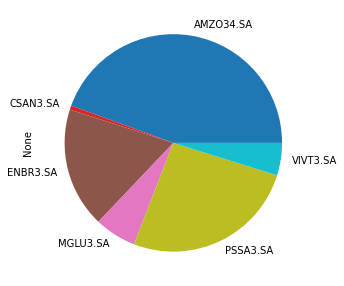

In [ ]:
# Portfolio Optimization

#Calculate the expected returns and the annualised sample covariance matrix of asset retuns

mu = expected_returns.mean_historical_return(df_stocks) # Average of the retunrs for each stock
s = risk_models.sample_cov(df_stocks) # Covariance of the data frame

# Maximixe return for a given risk

ef = EfficientFrontier(mu,s) # setup the parameters
weights_1 = ef.efficient_risk(target_volatility = 0.25) # Finding the maximum return
cleaned_weights_1 = ef.clean_weights() # weights for the minimum risk 

print(cleaned_weights_1)
ef.portfolio_performance(verbose = True) # Perfomance of the portfolio


pd.Series(cleaned_weights_1).plot.pie(figsize=(5, 5));

#get the discrete allocation of each share per stock for Model which maximize return

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(cleaned_weights_1, latest_prices, total_portfolio_value = 10000)
allocation, leftover = da.lp_portfolio()
print('Discrete Allocation:', allocation)
print('Funds remaing:${:.2f}'. format(leftover))

OrderedDict([('AURA33.SA', 0.0), ('CSAN3.SA', 0.0), ('ENBR3.SA', 0.75418), ('VIVT3.SA', 0.24582)])
Expected annual return: 10.0%
Annual volatility: 18.9%
Sharpe Ratio: 0.42
Discrete Allocation: {'ENBR3.SA': 489}
Funds remaing:$9.73


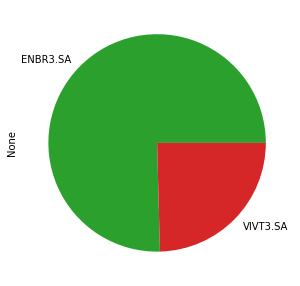

In [ ]:
# Minimise risk for a given return 

ef = EfficientFrontier(mu,s) # Set the parameters
weights = ef.efficient_return(target_return = 0.1) #Finding the minimum risk 
cleaned_weights_2 = ef.clean_weights()

print(cleaned_weights_2)
ef.portfolio_performance(verbose = True) # Perfomance of the portfolio


pd.Series(cleaned_weights_2).plot.pie(figsize=(5, 5));

#get the discrete allocation of each share per stock for Model which maximize return

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(cleaned_weights_1, latest_prices, total_portfolio_value = 10000)
allocation, leftover = da.lp_portfolio()
print('Discrete Allocation:', allocation)
print('Funds remaing:${:.2f}'. format(leftover))

OrderedDict([('AMZO34.SA', 0.12733), ('AURA33.SA', 0.15863), ('BRAP4.SA', 0.04087), ('CSAN3.SA', 0.03808), ('CSNA3.SA', 0.0), ('ENBR3.SA', 0.2027), ('MGLU3.SA', 0.0), ('NTCO3.SA', 0.0), ('PSSA3.SA', 0.20213), ('VIVT3.SA', 0.23027)])
Expected annual return: 11.3%
Annual volatility: 17.4%
Sharpe Ratio: 0.53


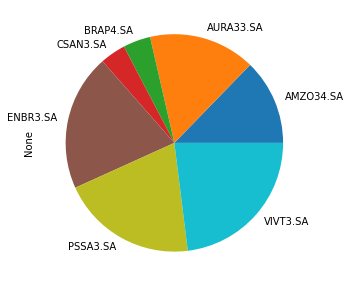

In [ ]:
#optimize for minimum volatility

ef = EfficientFrontier(mu,s) # setup the parameters
weights_3  = ef.min_volatility() # Finding the minimum risk 
cleaned_weights_3 = ef.clean_weights() # weights for the minimum risk 

print(cleaned_weights_3)
ef.portfolio_performance(verbose = True) # Perfomance of the portfolio


pd.Series(cleaned_weights_3).plot.pie(figsize=(5, 5));